In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [75]:
pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     -------------------------------------- 282.6/282.6 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [77]:
from yellowbrick.cluster import KElbowVisualizer

In [78]:
airline_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [79]:
# Column Rename and Set ID as Index Column
airline_data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
airline_data.set_index('ID',inplace=True)
airline_data


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


## Data Understanding

In [80]:
airline_data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [81]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


### Different cc_miles have different max values. so, we want to check what values these columns can take

In [82]:
print('unique_cc1',airline_data.cc1_miles.unique())
print('unique_cc2',airline_data.cc2_miles.unique())
print('unique_cc3',airline_data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


## Missing Values

In [83]:
airline_data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

#  Exploratory Data Analysis
### Analyze the features by creating histograms to understand the distribution

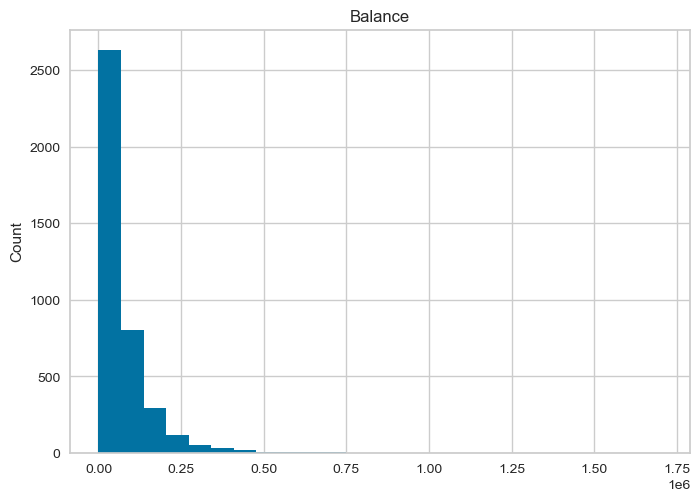

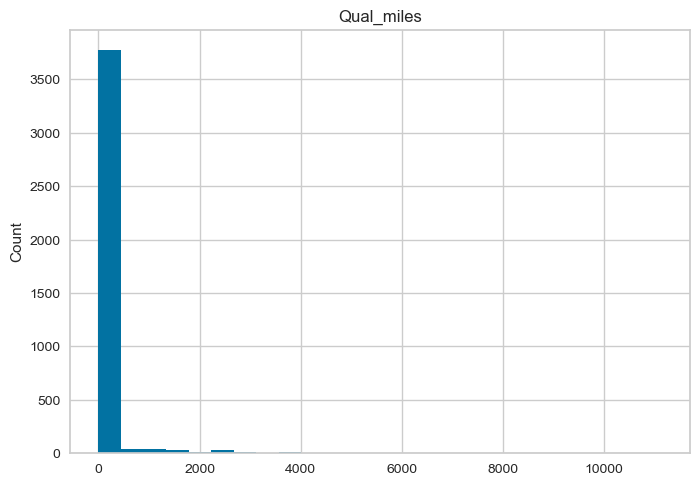

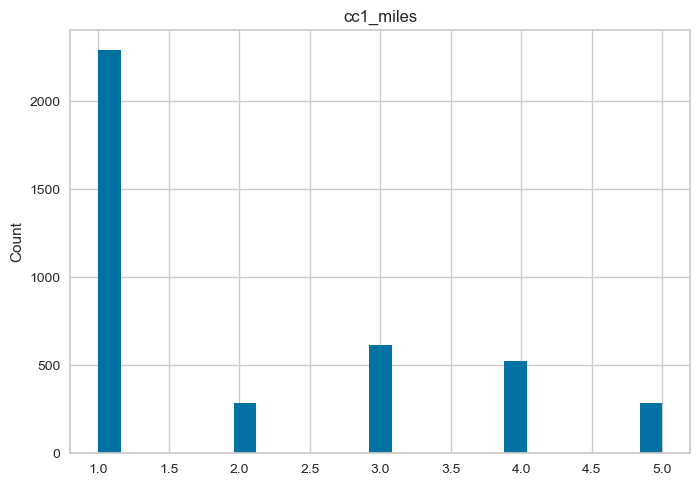

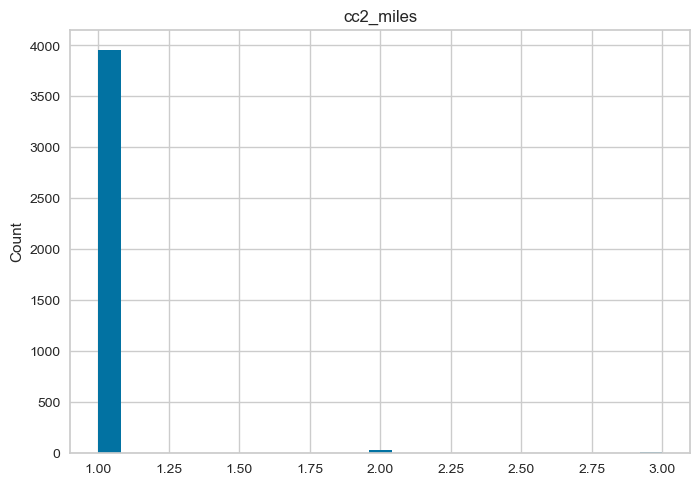

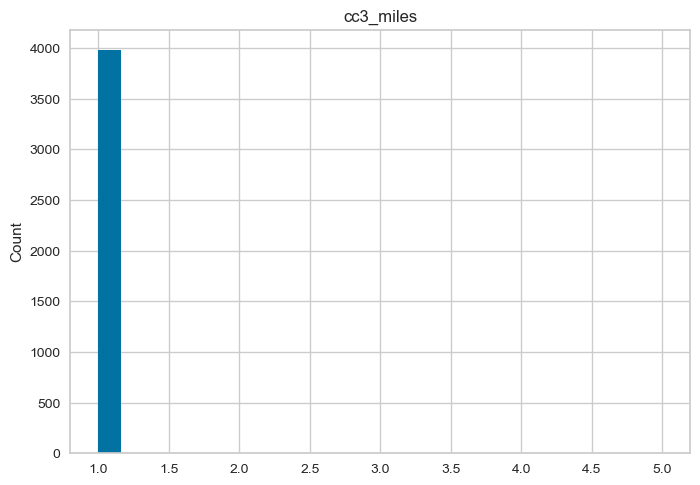

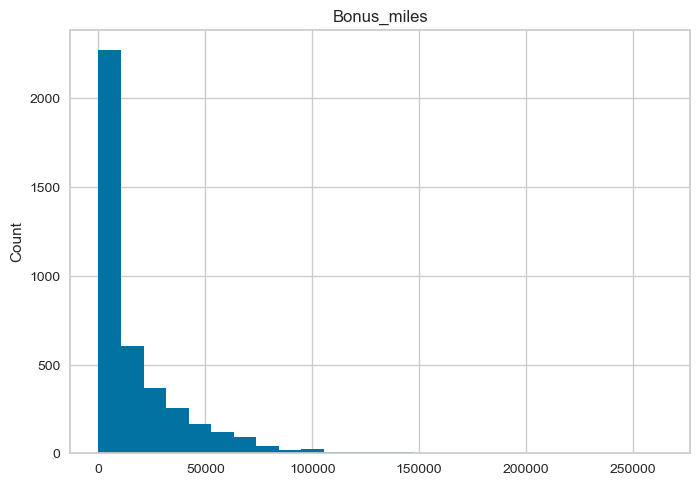

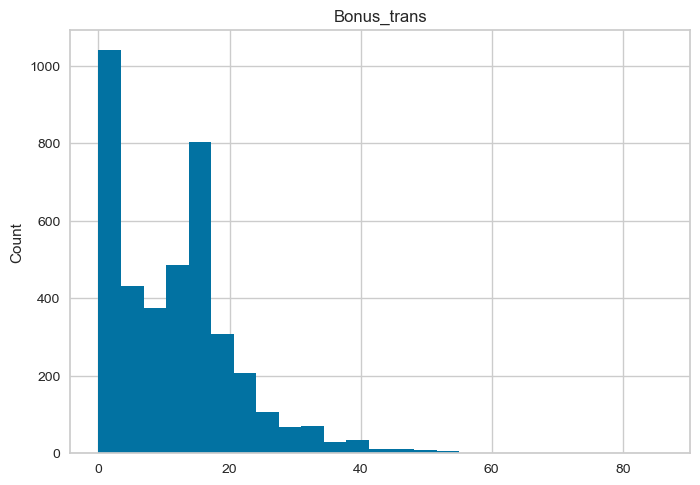

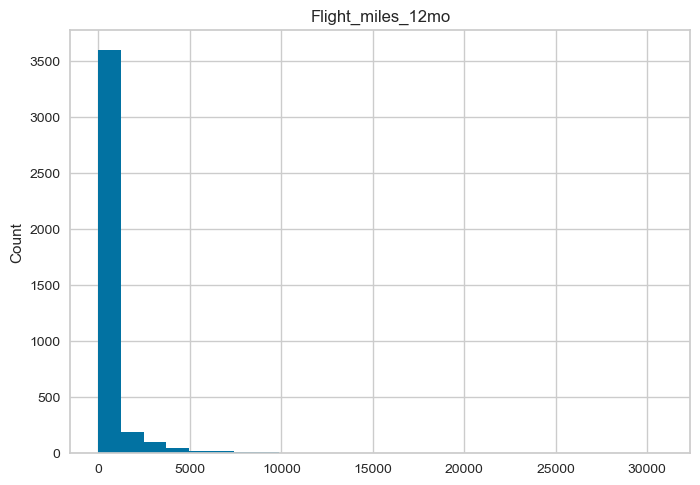

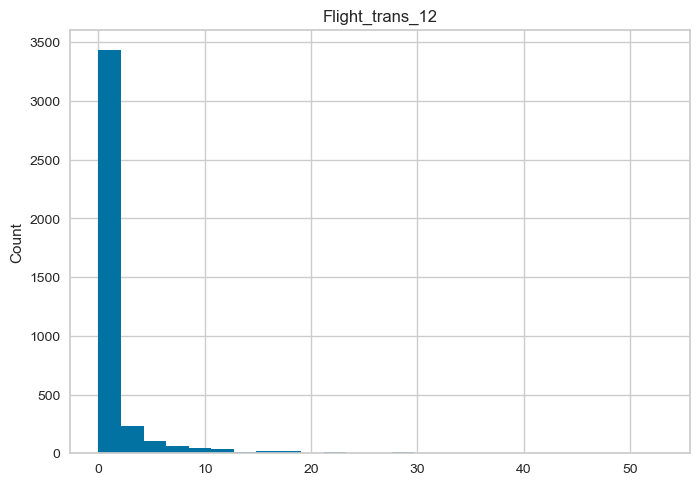

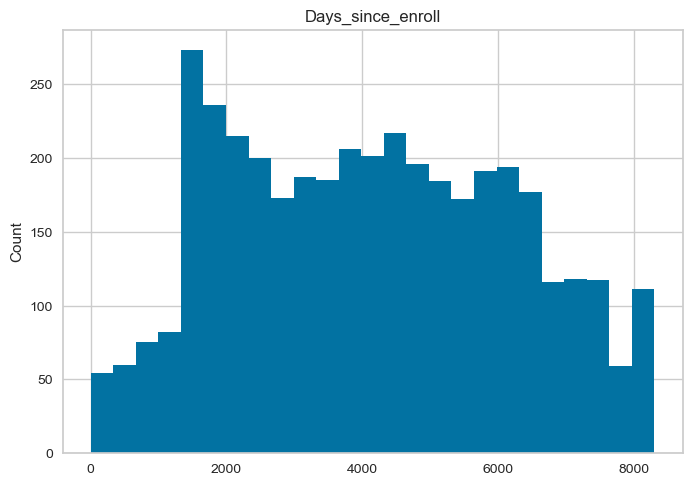

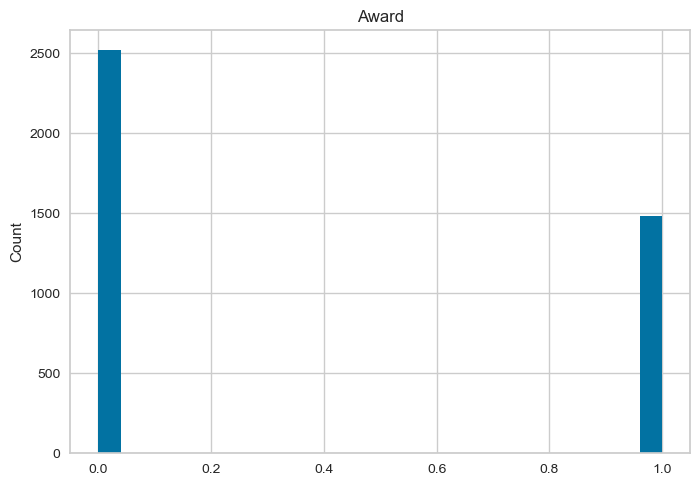

In [84]:
for feature in airline_data.columns:
    airline_data1 = airline_data.copy()
    airline_data1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## Outliers Detection

In [85]:
airline_data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

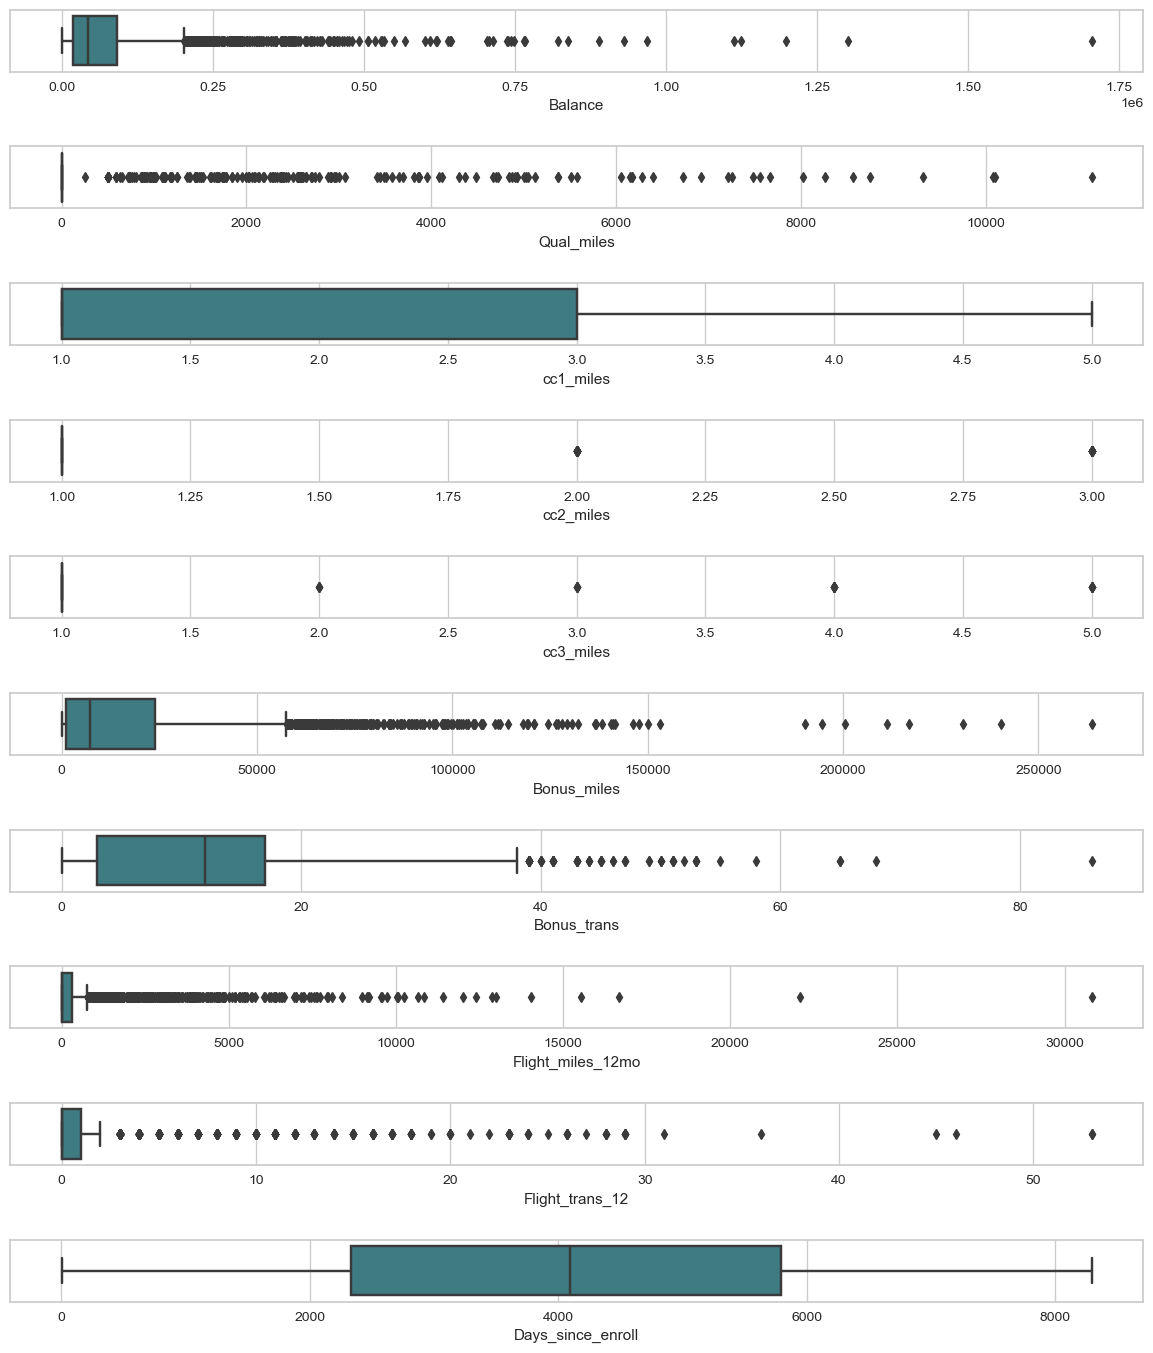

In [86]:
outlier = airline_data.copy() 
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

In [87]:
countNotermdeposit = len(airline_data[airline_data.Award == 0])
countHavetermdeposit = len(airline_data[airline_data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(airline_data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((countHavetermdeposit / (len(airline_data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


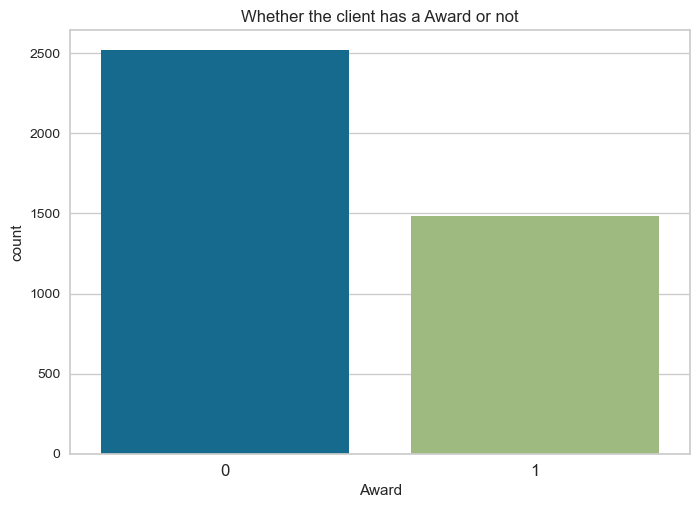

In [88]:
sns.countplot(x='Award', data= airline_data, order= airline_data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not')
plt.show()

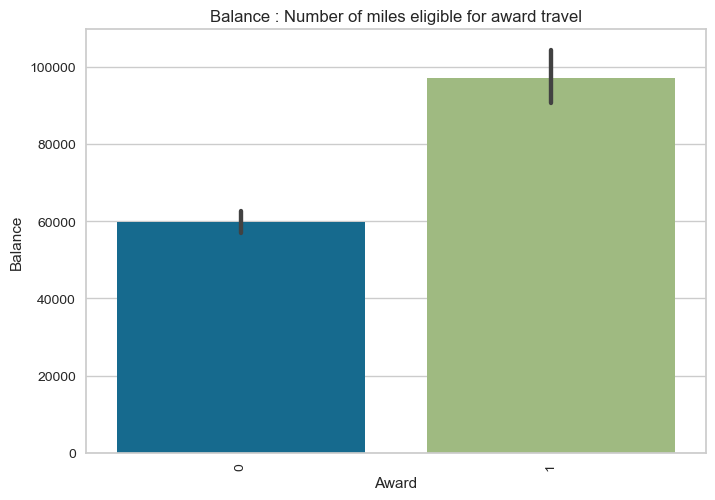

In [89]:
Balance = airline_data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.title('Balance : Number of miles eligible for award travel')
plt.xticks(rotation=90)
plt.show()

In [90]:
# What is correlated with Balance?
corr_matrix = airline_data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

# Correlation Heatmap 

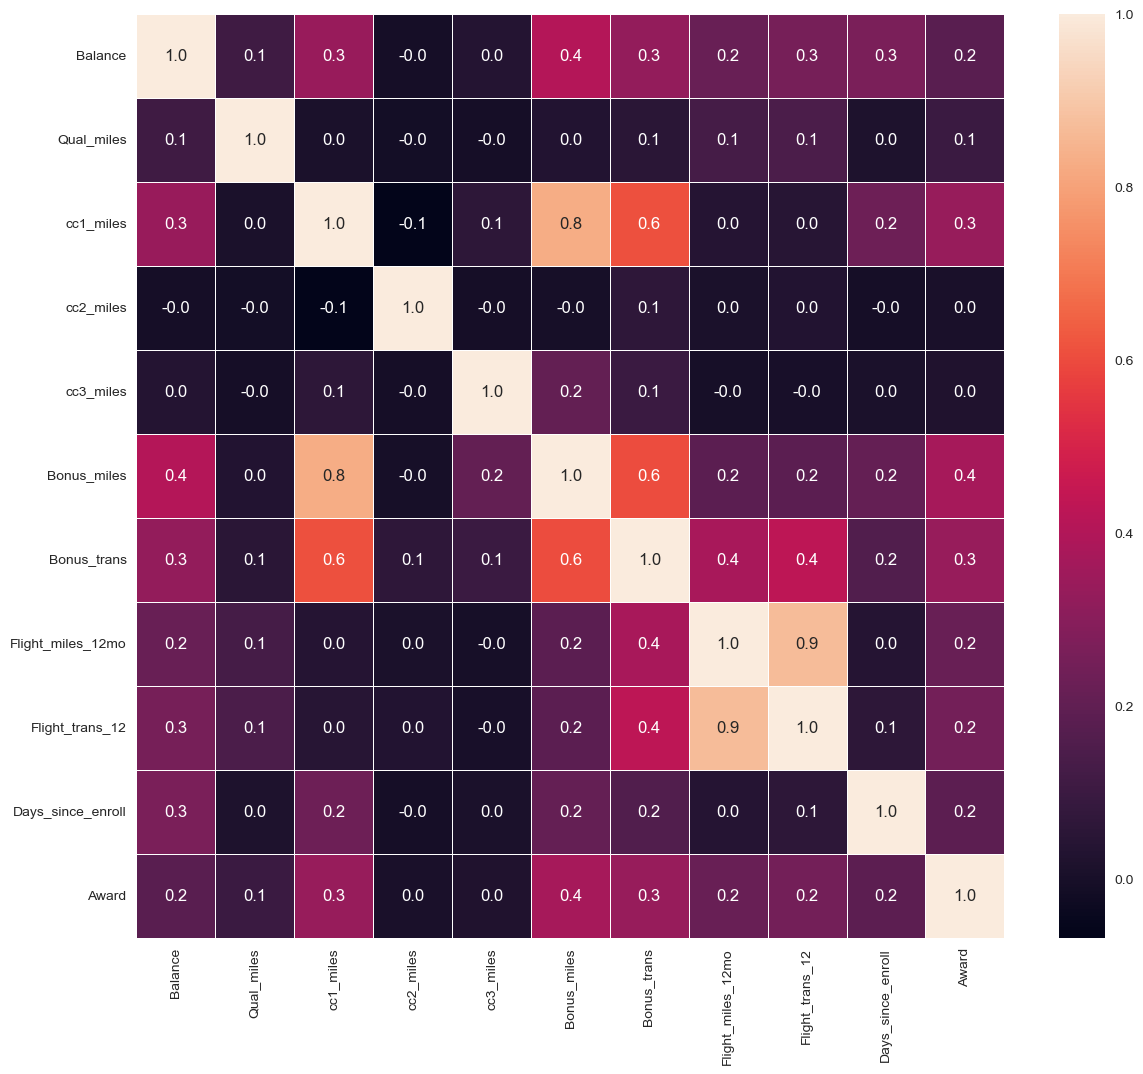

In [91]:
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(airline_data.corr(), annot=True, linewidths =.6, fmt ='.1f',ax=ax)
plt.show()

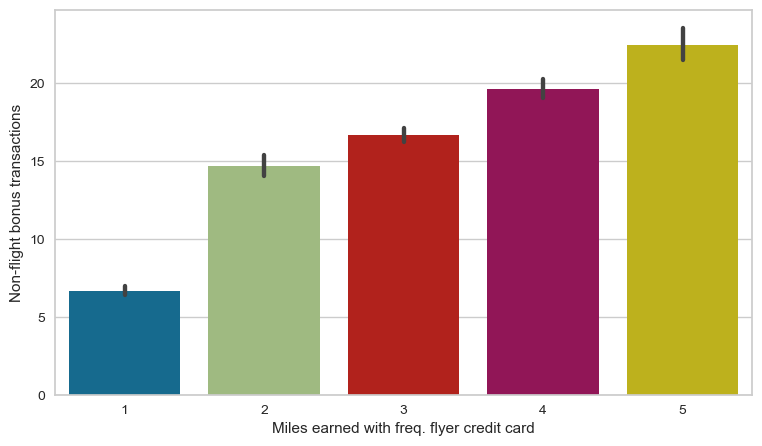

In [92]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions


plt.figure(figsize = (9,5))
sorted_data = airline_data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

# Data Preprocessing
## Standardizing the Data

In [93]:
standard_scaler = StandardScaler()
std_airline = standard_scaler.fit_transform(airline_data)
std_airline.shape


(3999, 11)

## Normalizing the data


In [94]:
minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(airline_data)
norm_airline.shape

(3999, 11)

## K Means Clustering
### Elbow Method for Determining Cluster Amount
### Standard Scaler Applied on Data

In [95]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,43989.000000
1,2,35409.516630
2,3,30899.220474
3,4,27154.040724
4,5,23706.694308
5,6,21089.814810
6,7,19166.791604
7,8,17322.676600
8,9,16043.408790
9,10,14727.938878


### Within-Cluster Sum-of-Squares Criterion
#### Use Elbow Graph to find optimum number of clusters (K value) from K values range
#### The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS
#### Random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

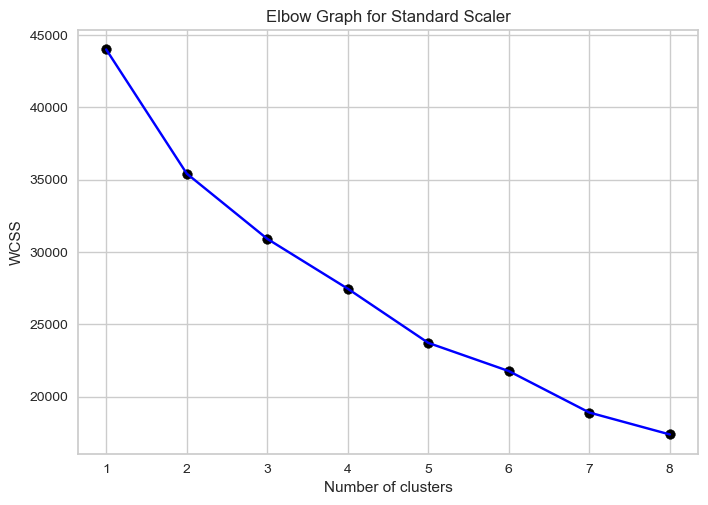

In [96]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_airline)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'blue')
plt.scatter(range(1,9),wcss,color='black')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score.
## Silhouette Score

In [97]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_airline)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_airline, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

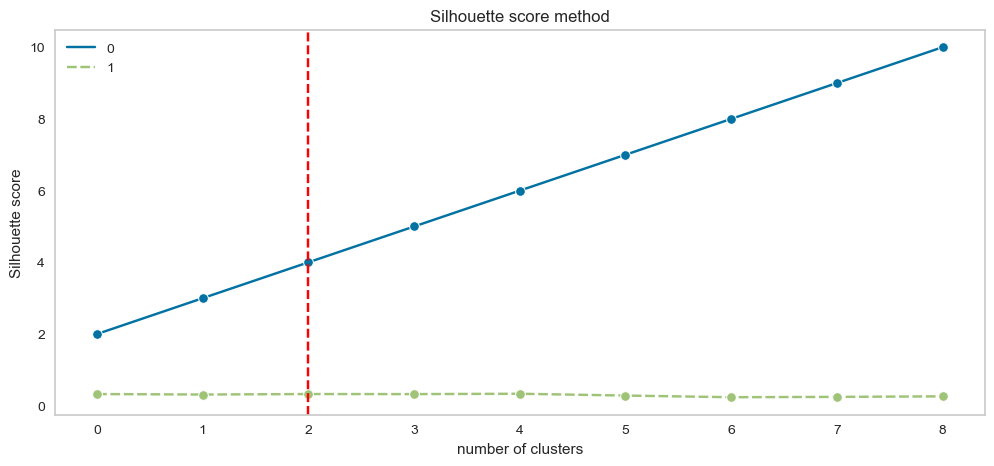

In [98]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot((n_clusters, s_scores), marker='o',ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

## Silhouette score method indicates the best options would be respectively 2 clusters.

Elbow Plot for Standard Scaler data


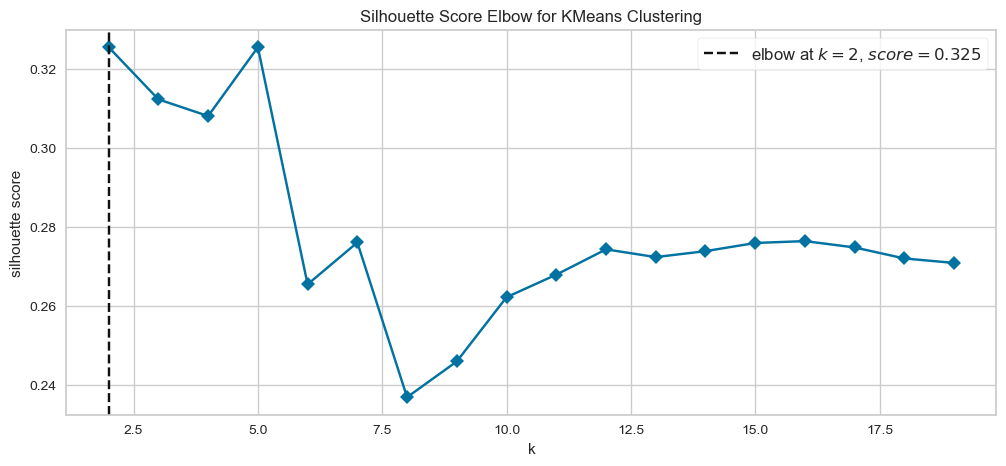

In [99]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
fig, ax = plt.subplots(figsize=(12,5))
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_airline)    
visualizer.poof()
plt.show()

In [101]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_airline)
    sil_score1= silhouette_score(std_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32542136327826215
For n_clusters = 3 The average silhouette_score is : 0.31191384766627117
For n_clusters = 4 The average silhouette_score is : 0.3099108192228768
For n_clusters = 5 The average silhouette_score is : 0.3353447174269873
For n_clusters = 6 The average silhouette_score is : 0.2788033904667631
For n_clusters = 7 The average silhouette_score is : 0.2836461929303771
For n_clusters = 8 The average silhouette_score is : 0.23655403102028674
For n_clusters = 9 The average silhouette_score is : 0.24591745011173718


## Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset
### We have found good number of cluster = 6
### Model building using cluster numbers = 6

In [102]:
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_airline)
y_predict_kmeans.shape

(3999,)

In [103]:
# these are nothing but cluster labels...
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [104]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [105]:
model_kmeans.cluster_centers_

array([[-0.15436921,  0.12224133, -0.26678883, -0.09824189, -0.06276658,
        -0.26852042, -0.10347479, -0.02661461, -0.01991719,  0.05352069,
         1.29384109],
       [-0.29965686, -0.09342981, -0.54597866, -0.09824189, -0.06030264,
        -0.51318446, -0.46455782, -0.21545477, -0.23737426, -0.24011724,
        -0.7669193 ],
       [ 0.63426351, -0.01770954,  1.48483175, -0.09824189, -0.05145859,
         1.26492109,  0.84042624, -0.06283237, -0.06241679,  0.45899739,
         0.43992637],
       [ 1.25116283,  0.87901237,  0.16817169, -0.09824189, -0.06276658,
         0.73352254,  1.76984334,  3.89902834,  4.14964398,  0.29011908,
         0.9330219 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.051

In [106]:
model_kmeans.inertia_

21470.514549809286

## Assign clusters to the data set

In [108]:
airline_df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
airline_df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
airline_df['Kmeans_Label'] = model_kmeans.labels_

In [109]:
# Group data by Clusters (K=6)
airline_df.groupby('Kmeans_Label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1964.041363,58046.613139,238.676399,1.692214,1.000000,1.000000,10660.628954,10.608273,422.794404,1.298054,4229.072993,0.995134
1,2278.765159,43402.377767,71.874880,1.307026,1.000000,1.000481,4746.563041,7.137632,158.487969,0.473532,3620.526468,0.000000
2,1494.157663,137418.463065,130.271224,4.102536,1.000000,1.002205,47656.343991,19.665932,371.678060,1.135612,5069.828004,0.582139
3,1714.850746,199672.328358,824.089552,2.291045,1.000000,1.000000,34857.910448,28.597015,5918.828358,17.111940,4717.619403,0.820896
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


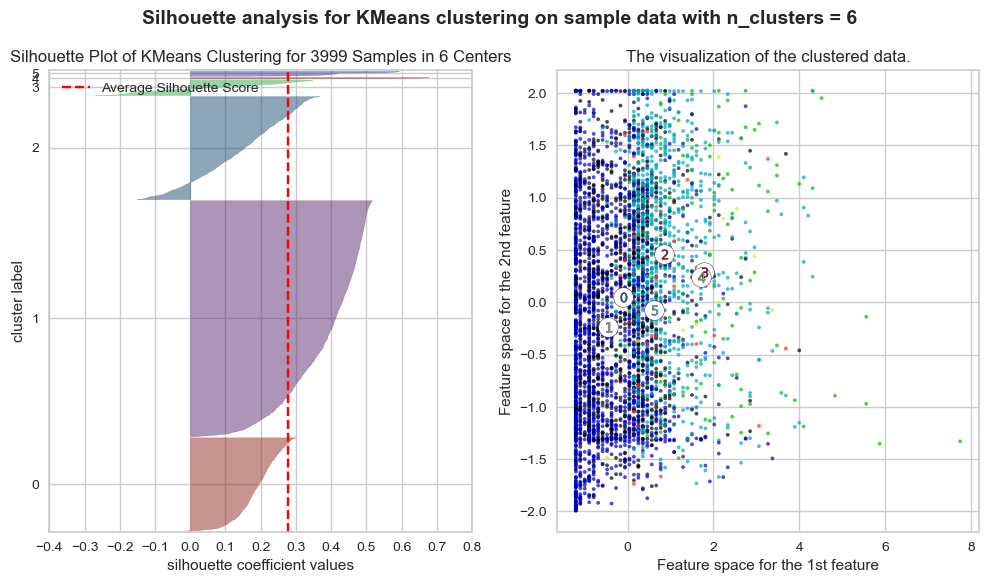

In [110]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_airline)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_airline[:, 6], std_airline[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

## Plotting barplot using groupby method to get visualize how many row no. in each cluster

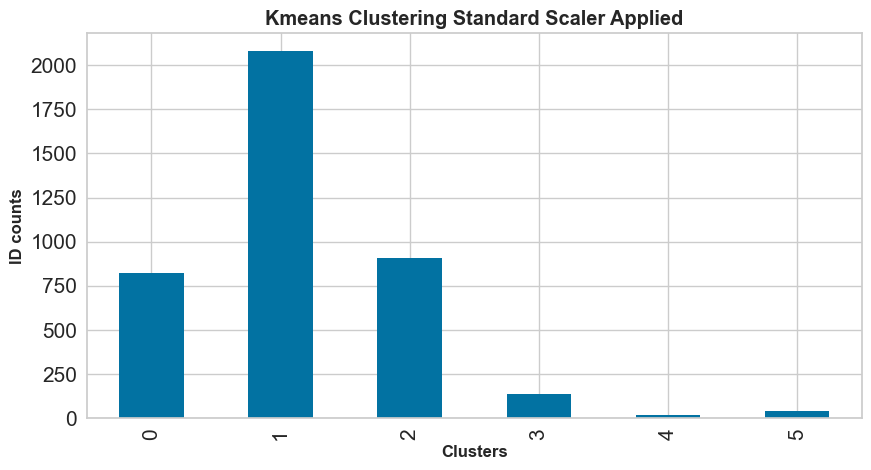

In [111]:
fig, ax = plt.subplots(figsize=(10,5))
airline_df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

##  Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [112]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(norm_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,1830.793213
1,2,823.675698
2,3,625.176821
3,4,436.708858
4,5,348.943322
5,6,315.362649
6,7,287.895168
7,8,263.215769
8,9,243.925517
9,10,226.118246


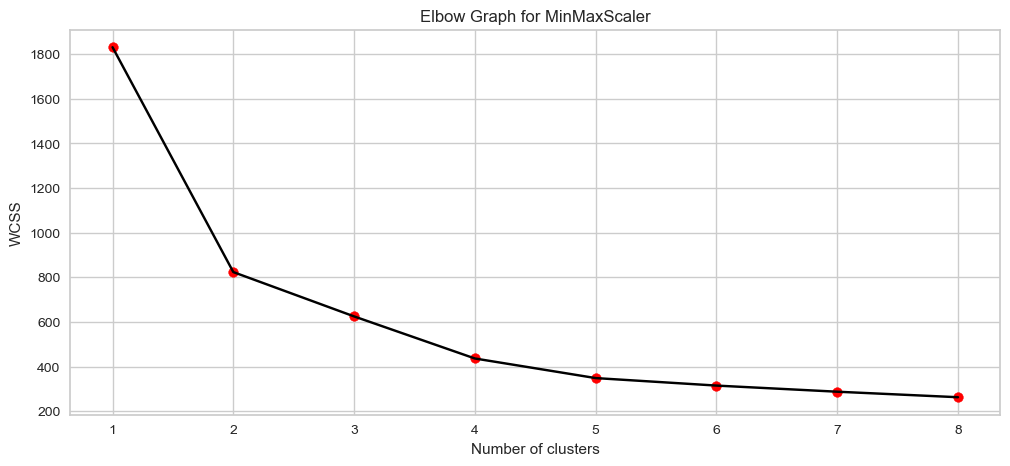

In [113]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_airline)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(range(1,9), wcss,color = 'black')
plt.scatter(range(1,9), wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

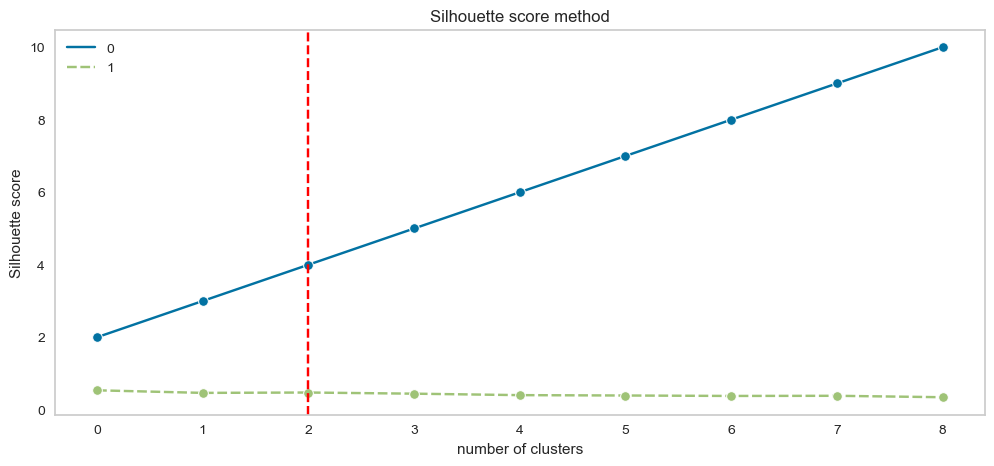

In [115]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(norm_airline)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(norm_airline, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot((n_clusters, s_scores), marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

## Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

Elbow Plot for Normalization data


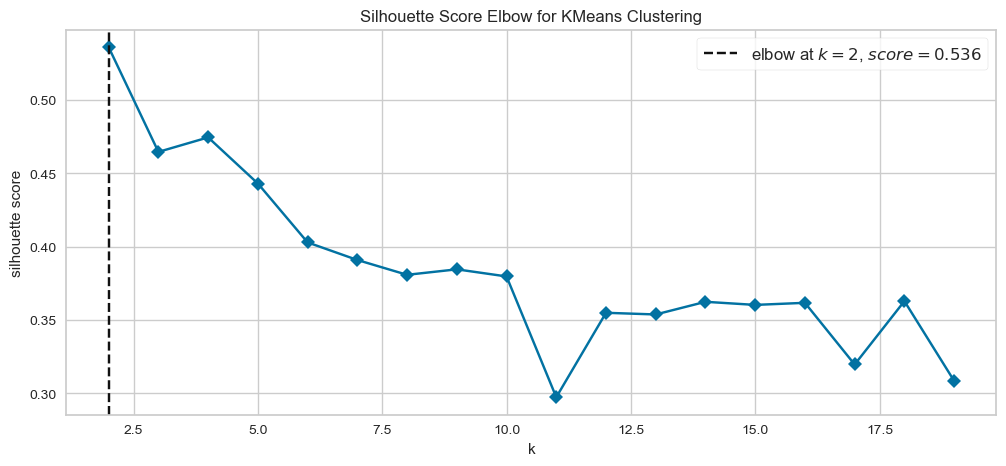

In [116]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')
plt.subplots(figsize=(12,5))
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Normalization data')
visualizer.fit(norm_airline)    
visualizer.poof()
plt.show()

In [117]:
clust_list = [2,3,4,5,6,7,8,9]

# Silhouette score for MinMaxScaler Applied on data .
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_airline)
    sil_score1= silhouette_score(norm_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.4646127065079619
For n_clusters = 4 The average silhouette_score is : 0.47483765255961
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.4021621004641961
For n_clusters = 7 The average silhouette_score is : 0.3909601011818369
For n_clusters = 8 The average silhouette_score is : 0.3808807264274982
For n_clusters = 9 The average silhouette_score is : 0.38454330389289343


## Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset
### We have found good number of cluster = 2
### Model building using cluster numbers = 2

In [118]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(norm_airline)
y_predict_kmeans.shape

(3999,)

In [119]:
# these are nothing but cluster labels...
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [120]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [121]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50812450e-02,  7.85813260e-03,  1.76330421e-01,
         6.94996029e-03,  2.18427323e-03,  3.87875269e-02,
         1.06313612e-01,  7.34309944e-03,  1.23113582e-02,
         4.60411394e-01, -4.99600361e-16]])

823.6756984125204

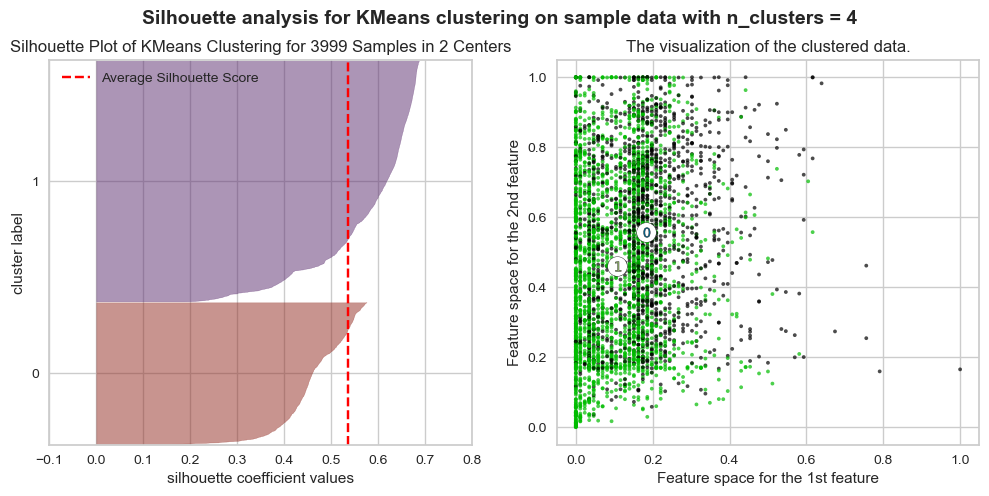

In [124]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,5)
sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(norm_airline)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(norm_airline[:, 6], norm_airline[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()


## Plotting barplot using groupby method to get visualize how many row no. in each cluster

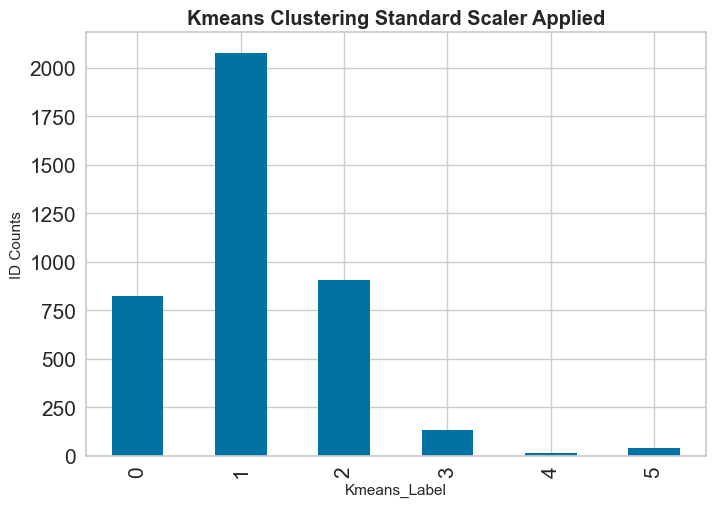

In [125]:
airline_df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [126]:
# Group data by Clusters (K=2)
airline_df.groupby('Kmeans_Label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1964.041363,58046.613139,238.676399,1.692214,1.000000,1.000000,10660.628954,10.608273,422.794404,1.298054,4229.072993,0.995134
1,2278.765159,43402.377767,71.874880,1.307026,1.000000,1.000481,4746.563041,7.137632,158.487969,0.473532,3620.526468,0.000000
2,1494.157663,137418.463065,130.271224,4.102536,1.000000,1.002205,47656.343991,19.665932,371.678060,1.135612,5069.828004,0.582139
3,1714.850746,199672.328358,824.089552,2.291045,1.000000,1.000000,34857.910448,28.597015,5918.828358,17.111940,4717.619403,0.820896
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


## Hierarchical Clustering Algorithm

#### Dendogram on MinMaxScaler Applied on Dataset

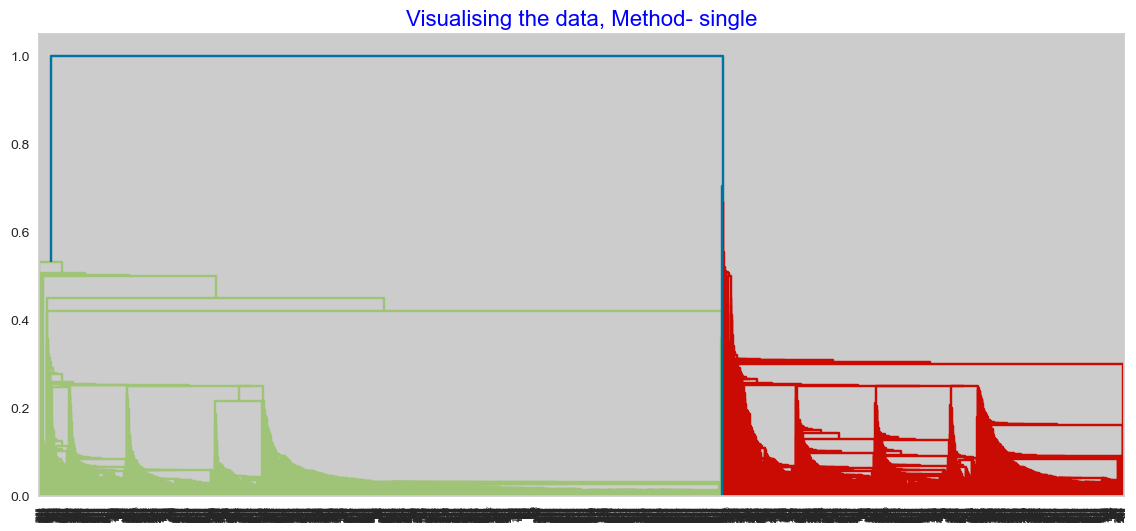

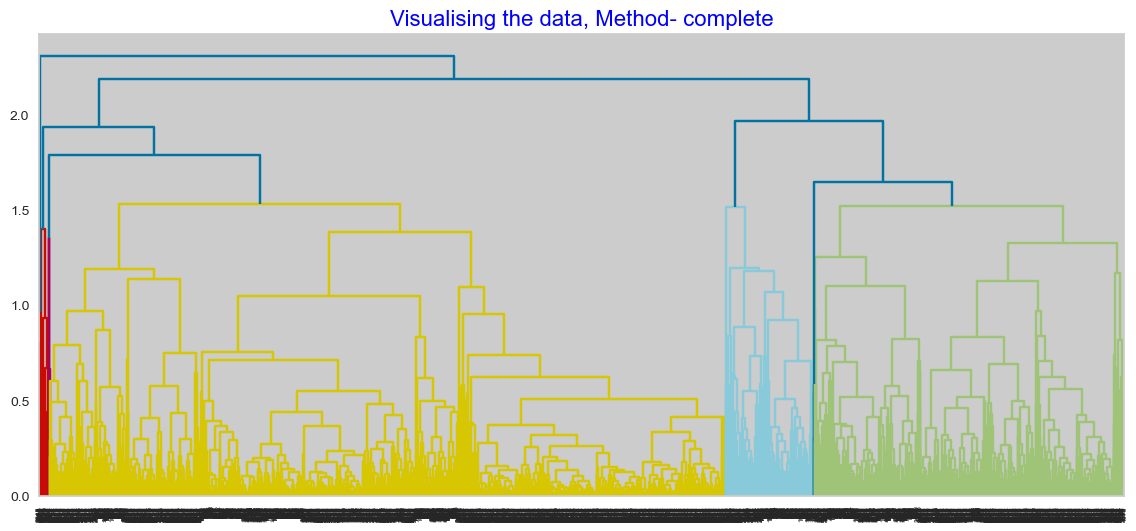

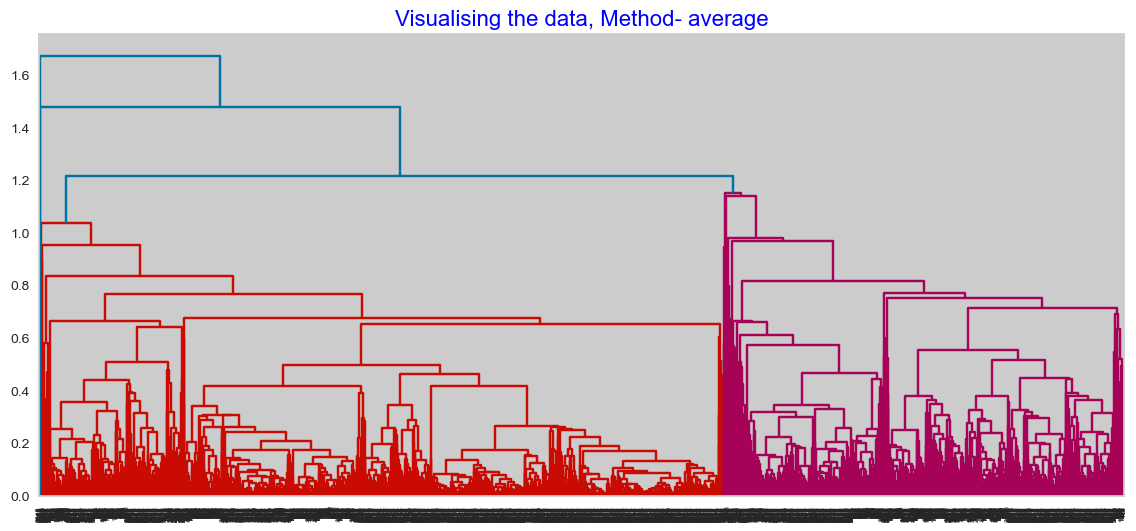

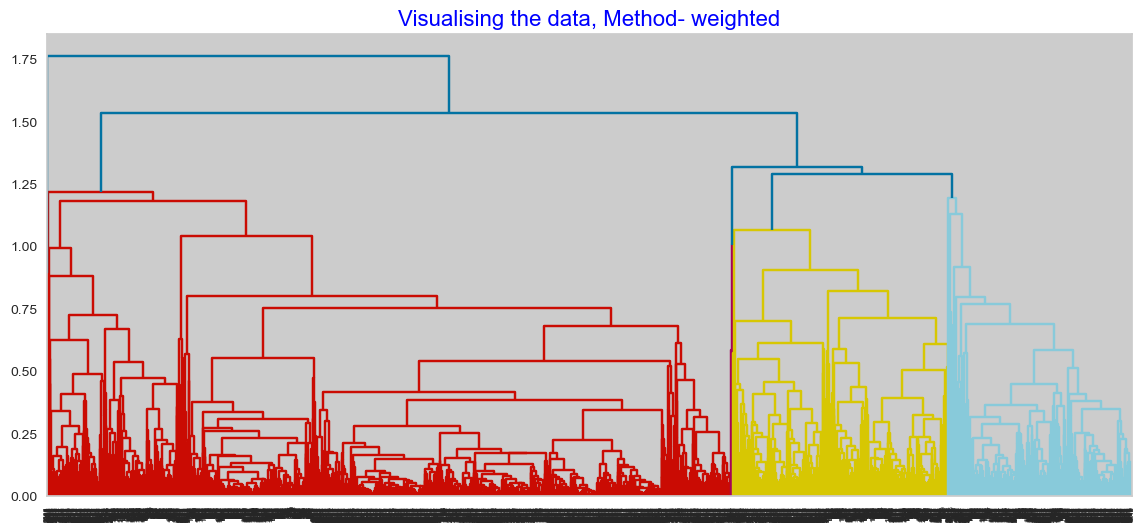

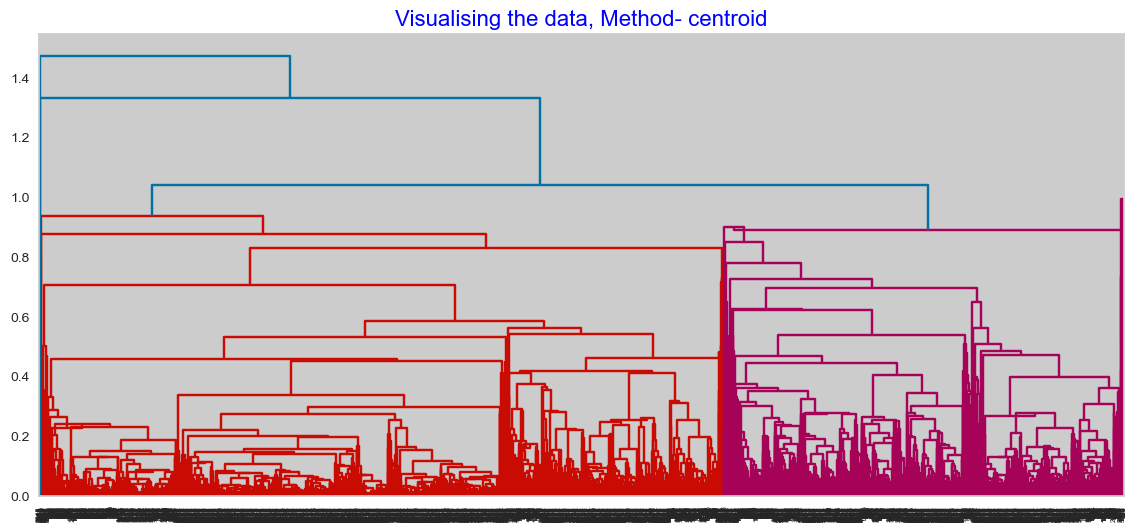

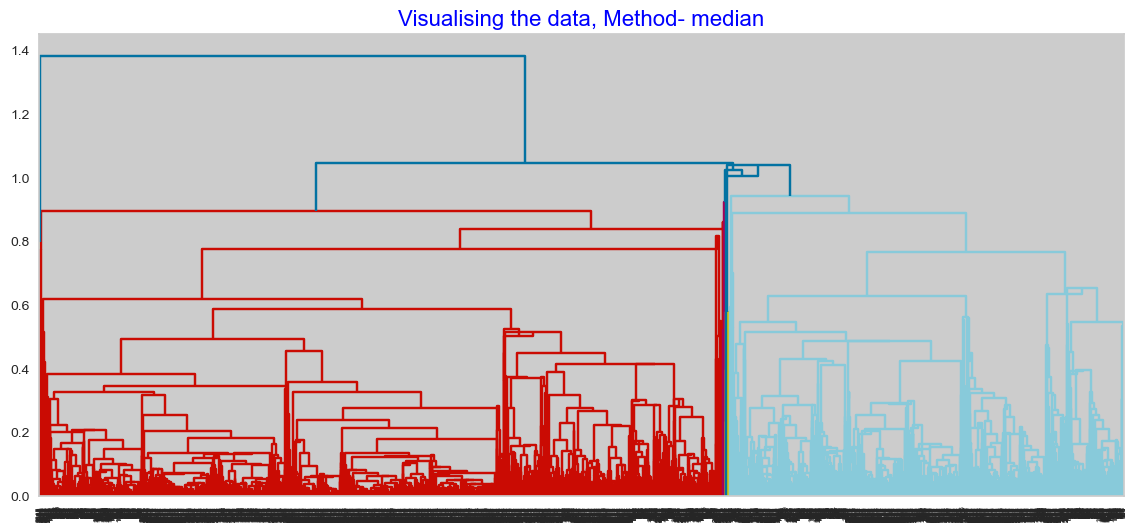

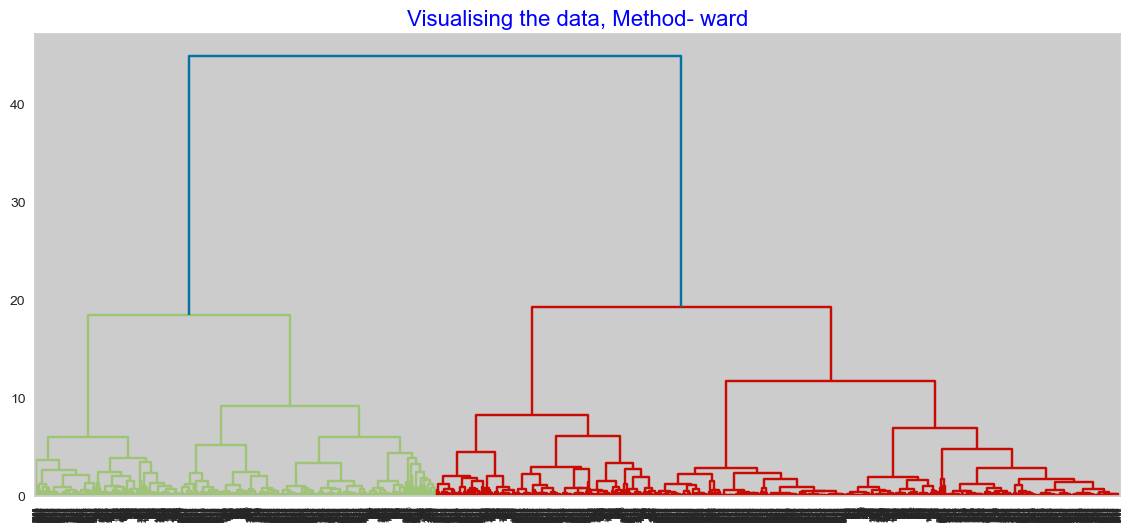

In [127]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))    
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_airline, method = methods,optimal_ordering=False))


In [128]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_airline)
        silhouette_score1 = silhouette_score(norm_airline, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
F

## Dendrogram on Standard Scaler Applied on Data

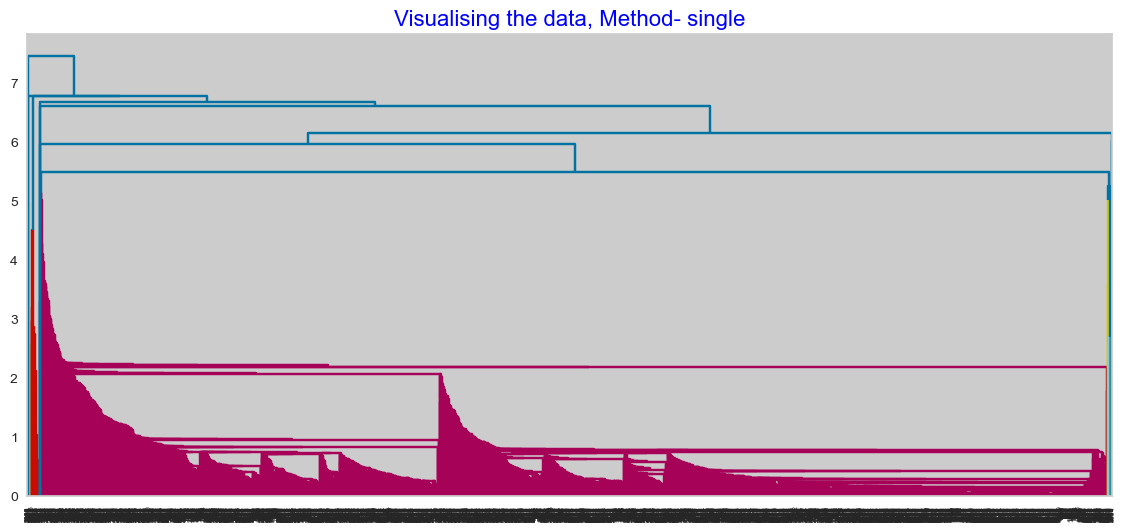

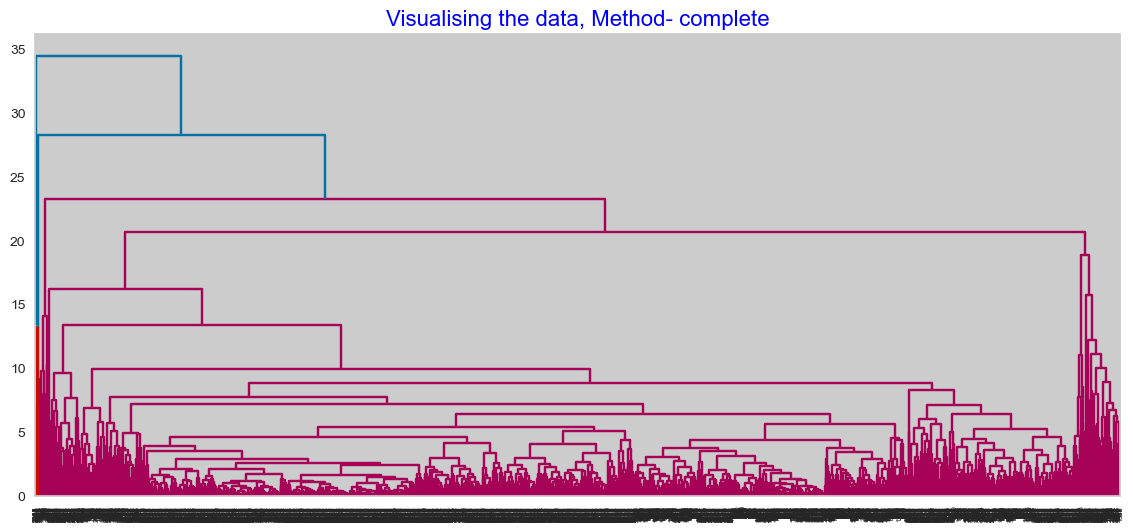

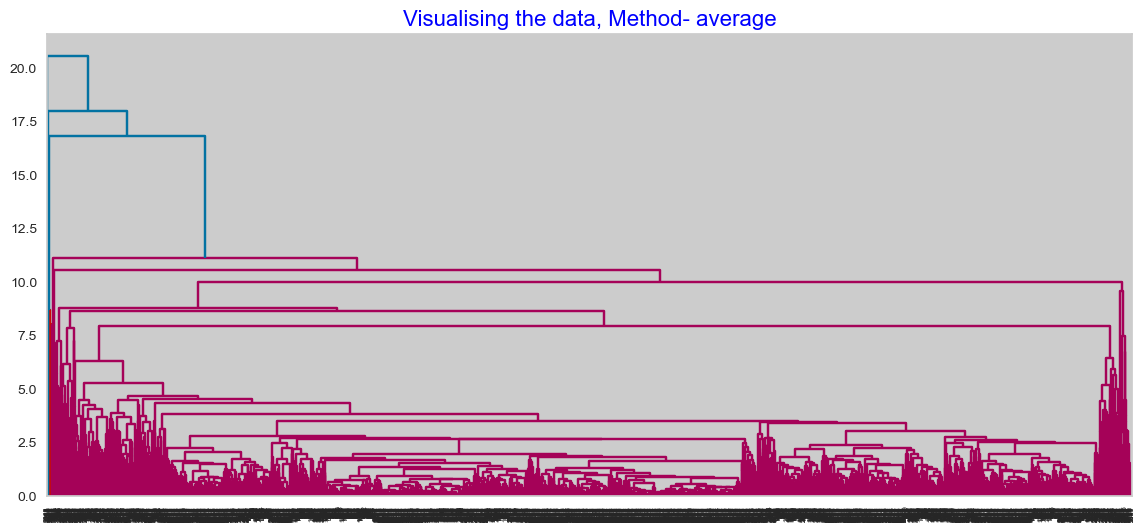

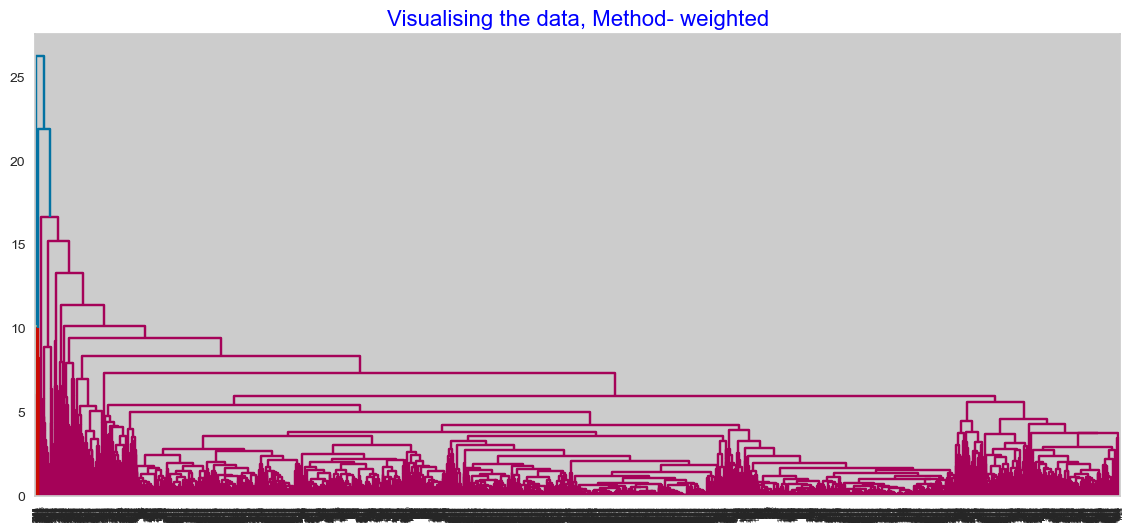

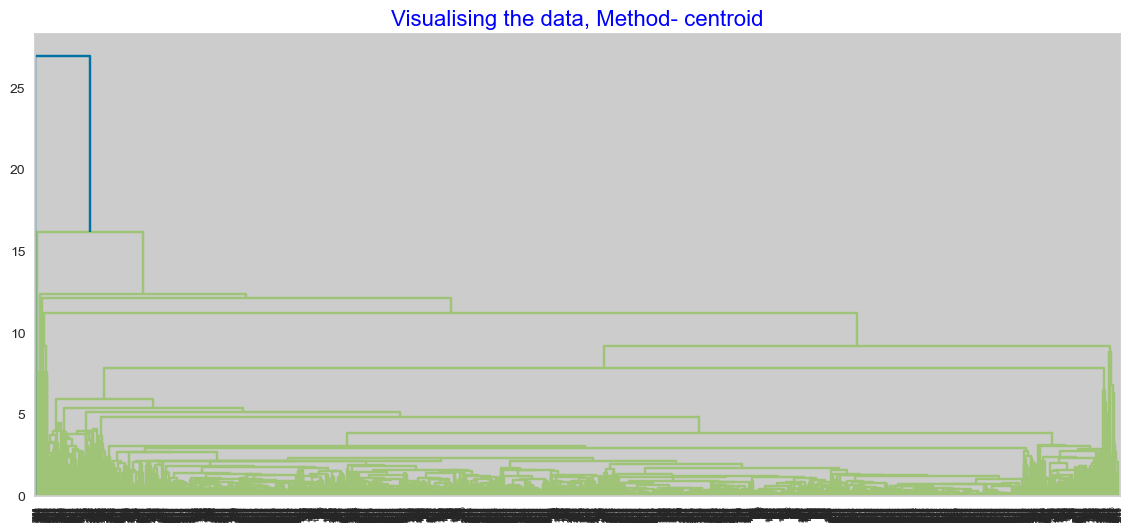

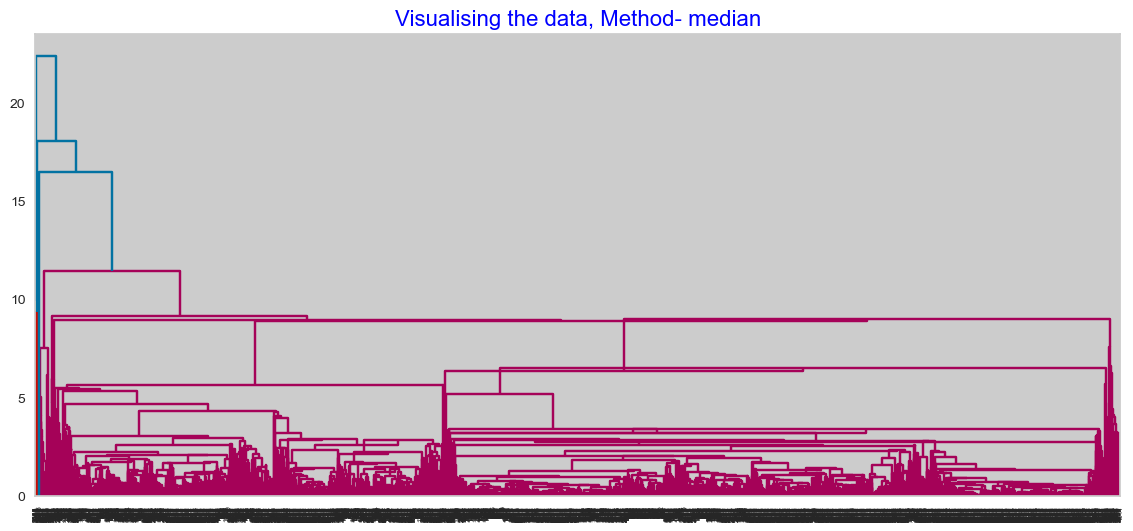

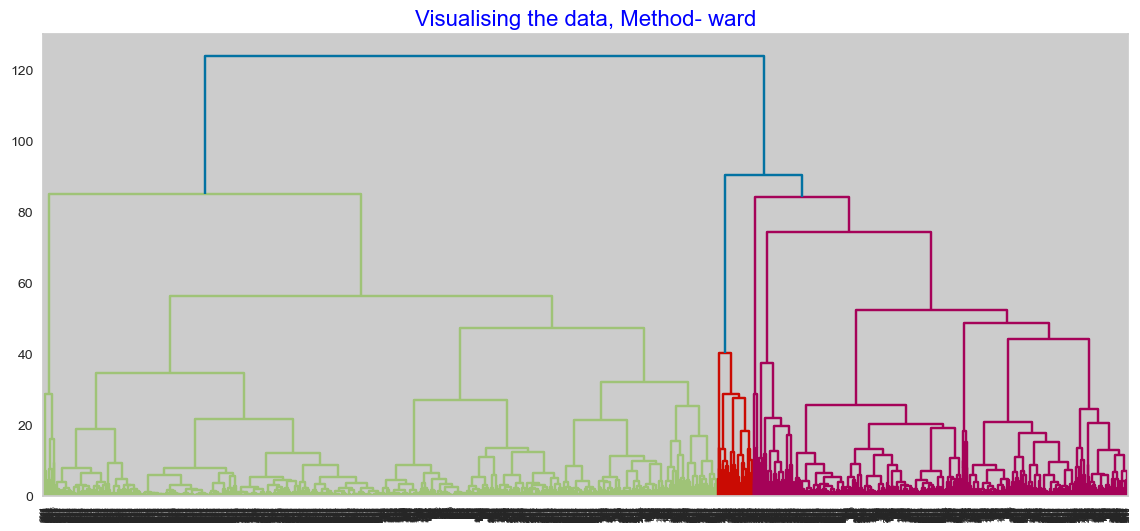

In [129]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))    
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = sch.dendrogram(sch.linkage(std_airline, method = methods,optimal_ordering=False))


In [130]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(std_airline)
        silhouette_score2 = silhouette_score(std_airline, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28926595242577247
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562820070415407

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2940432062008608
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760836053602842
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838667595062349
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350532148998382

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30814152852022786
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985727763092806
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7731120442583631
For

## Run Hierarchical Clustering (Agglomerative Clustering)

In [131]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_airline)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [132]:
# Cluster numbers
agg_clustering.n_clusters_

2

In [133]:
# Clustering Score
(silhouette_score(norm_airline, agg_clustering.labels_)*100).round(3)

53.593

## Putting Cluster lables into original dataset And analysis of the same

In [134]:
# Concating Labels with main dataset copy
airline_df['Hierarchical_Labels'] = agg_clustering.labels_

In [135]:
airline_df.groupby('Hierarchical_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.217633
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.014855


#  DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

## DBSCAN of Standard Scaled Data

### To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [136]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [137]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_airline)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_airline, DBS_clustering.labels_))

### Collecting number of generated clusters.

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


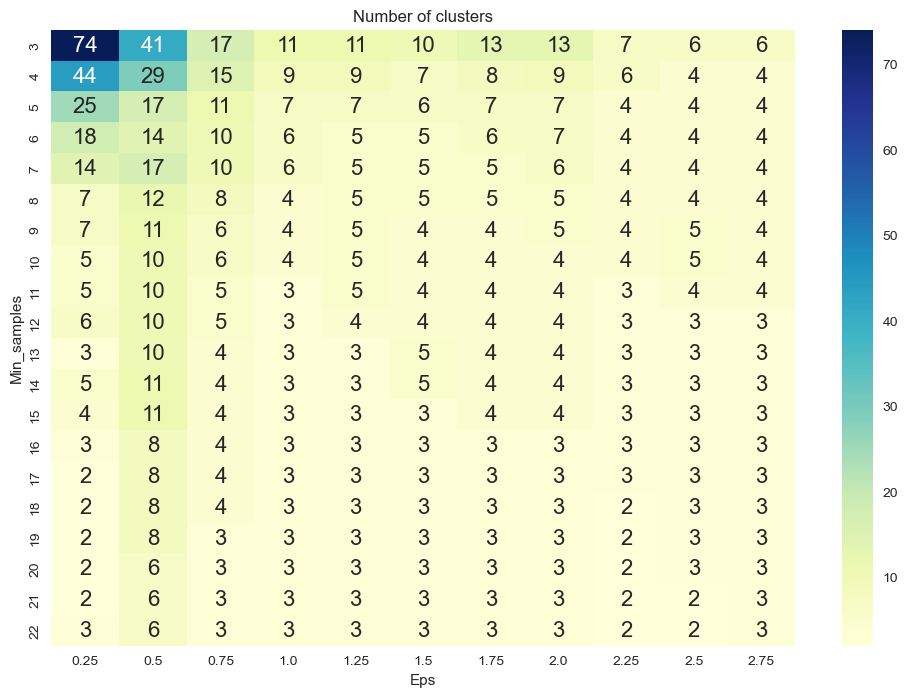

In [138]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

### As the heatplot above shows, the number of clusters vary from 74 to 2.

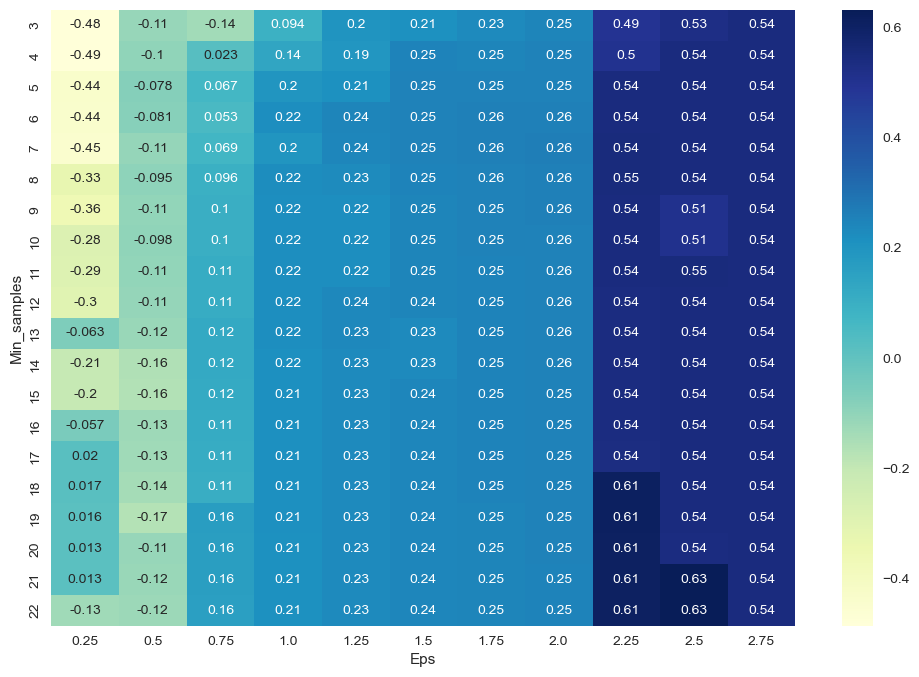

In [139]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

### Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22

In [140]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_airline)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [141]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_airline)

DBSCAN(eps=2.5, min_samples=21)

### Concating Labels with main dataset copy

In [142]:
airline_df['DBSCAN_Labels'] = dbscan.labels_
airline_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0


In [143]:
airline_df.groupby('DBSCAN_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,
-1,1708.947115,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,3.009615,0.687500
0,2031.601688,66008.336587,68.482722,2.034819,1.000000,1.000000,15598.138486,10.880243,305.532577,0.925086,4082.893959,0.352941,1.040095,0.352941


### Plotting barplot using groupby method to get visualize how many row no. in each cluster

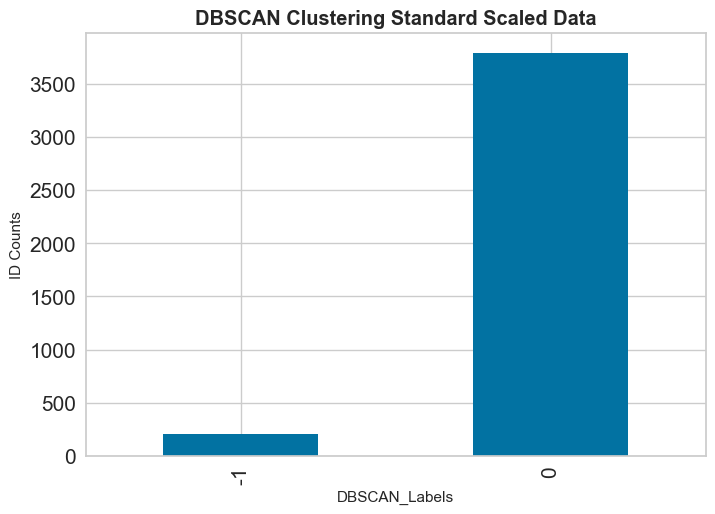

In [144]:
airline_df.groupby(['DBSCAN_Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## DBSCAN on MinMax Scaled Data
### To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [146]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [147]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_airline)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_airline, DBS_clustering.labels_))


### Collecting number of generated clusters.

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


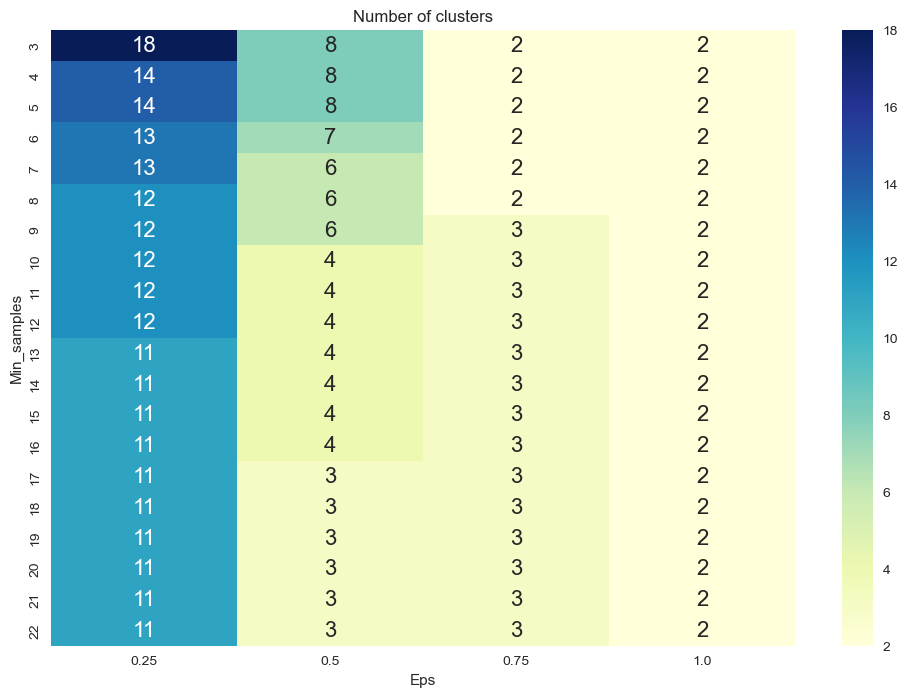

In [148]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

### As the heatplot above shows, the number of clusters vary from 18 to 2.

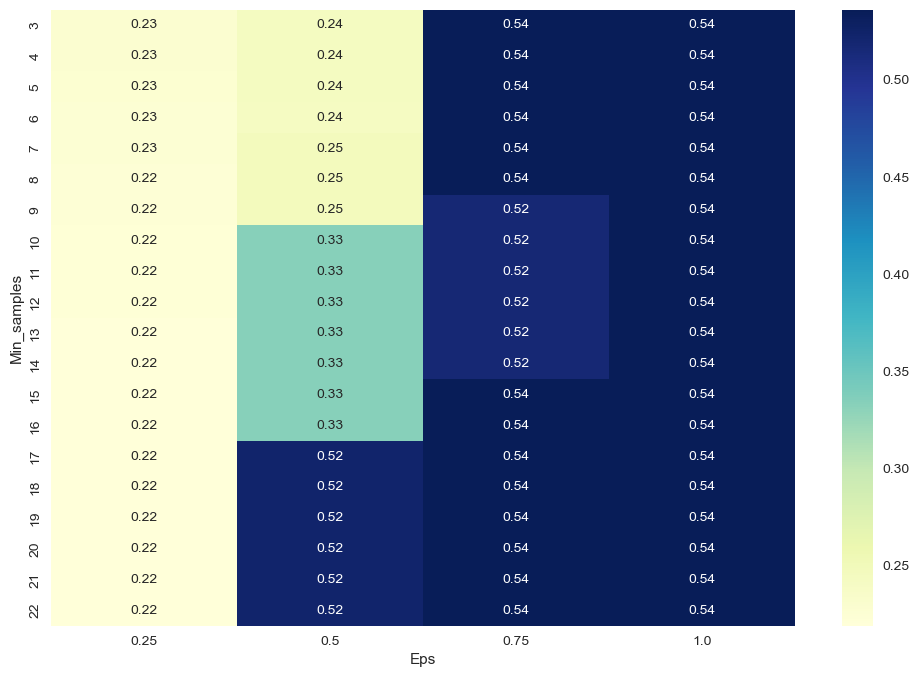

In [149]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

### Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3

In [150]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


In [151]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


### Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values

In [152]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(norm_airline)

DBSCAN(eps=1, min_samples=22)

### Concating Labels with main dataset copy

In [153]:
airline_df['DBSCAN_Labels'] = dbscan.labels_
airline_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,1


In [154]:
airline_df.groupby('DBSCAN_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.217633,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.014855,1.0


### Plotting barplot using groupby method to get visualize how many row no. in each cluster

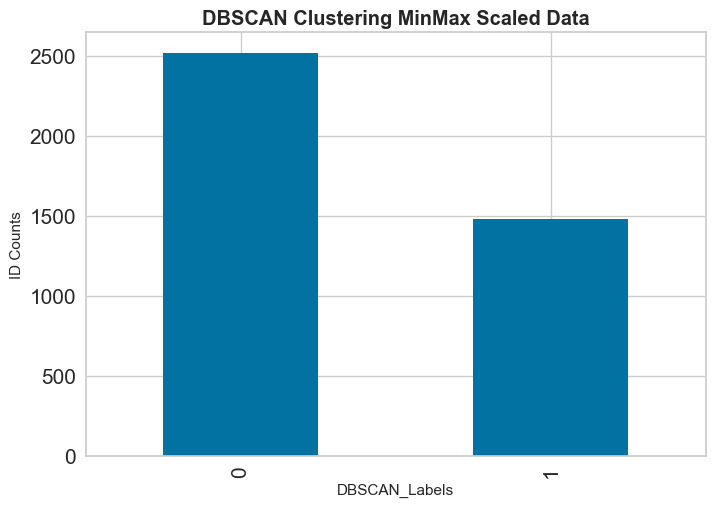

In [155]:
airline_df.groupby(['DBSCAN_Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Sorting elements based on cluster label assigned and taking average for insights.

In [156]:
cluster1 = pd.DataFrame(airline_df.loc[airline_df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(airline_df.loc[airline_df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_airline = pd.concat([cluster1,cluster2],axis=1)
avg_airline


,Cluster1_Avg,Cluster2_Avg
ID,2173.169182,1745.592843
Balance,59807.839555,97053.051317
Qual_miles,87.602462,240.196489
cc1_miles,1.705322,2.661715
cc2_miles,1.013900,1.015530
cc3_miles,1.008737,1.018231
Bonus_miles,10227.689039,28905.414585
Bonus_trans,9.142971,15.782579
Flight_miles_12mo,226.292295,857.501013
Flight_trans_12,0.652502,2.599595
